In [1]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=0683848d719ab22d693fb94fb2e91b8e31199f9e491eb3a564ee601736b77604
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


16.666666666666664


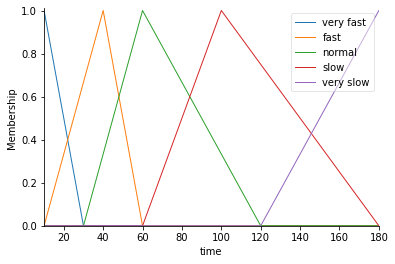

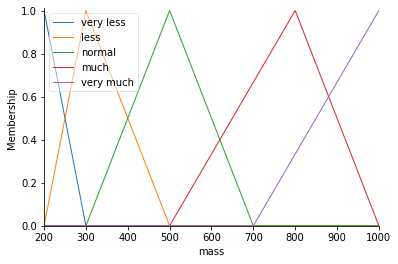

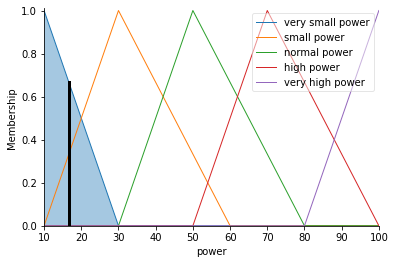

In [ ]:
#Bài 1: Bài toán nồi cơm điện
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,10),'time')     #antecedent : input
mass = ctrl.Antecedent(np.arange(200,1001,100),'mass')
power = ctrl.Consequent(np.arange(10,101,10),'power')
time['very fast'] = fuzz.trimf(time.universe,[10,10,30])
time['fast'] = fuzz.trimf(time.universe,[10,40,60])
time['normal'] = fuzz.trimf(time.universe,[30,60,120])              #(a,b,c) a: điểm đầu, b:điểm đỉnh, c: điểm cuối
time['slow'] = fuzz.trimf(time.universe,[60,100,180])
time['very slow'] = fuzz.trimf(time.universe,[120,180,180]) 

mass['very less'] = fuzz.trimf(mass.universe,[200,200,300])
mass['less'] = fuzz.trimf(mass.universe,[200,300,500])
mass['normal'] = fuzz.trimf(mass.universe,[300,500,700])
mass['much'] = fuzz.trimf(mass.universe,[500,800,1000])
mass['very much'] = fuzz.trimf(mass.universe,[700,1000,1000])

power['very small power'] = fuzz.trimf(power.universe,[10,10,30])
power['small power'] = fuzz.trimf(power.universe,[10,30,60])
power['normal power'] = fuzz.trimf(power.universe,[30,50,80])
power['high power'] = fuzz.trimf(power.universe,[50,70,100])
power['very high power'] = fuzz.trimf(power.universe,[80,100,100])

time.view()
mass.view()

rule1 = ctrl.Rule(time['very fast']&mass['very less'],power['normal power'])
rule2 = ctrl.Rule(time['fast']&mass['very less'],power['normal power'])
rule3 = ctrl.Rule(time['normal']&mass['very less'],power['small power'])
rule4 = ctrl.Rule(time['slow']&mass['very less'],power['small power'])
rule5 = ctrl.Rule(time['very slow']&mass['very less'],power['very small power'])
rule6 = ctrl.Rule(time['very fast']&mass['less'],power['normal power'])
rule7 = ctrl.Rule(time['fast']&mass['less'],power['normal power'])
rule8 = ctrl.Rule(time['normal']&mass['less'],power['small power'])
rule9 = ctrl.Rule(time['slow']&mass['less'],power['small power'])
rule10 = ctrl.Rule(time['very slow']&mass['less'],power['very small power'])
rule11 = ctrl.Rule(time['very fast']&mass['normal'],power['high power'])
rule12 = ctrl.Rule(time['fast']&mass['normal'],power['high power'])
rule13 = ctrl.Rule(time['normal']&mass['normal'],power['normal power'])
rule14 = ctrl.Rule(time['slow']&mass['normal'],power['small power'])
rule15 = ctrl.Rule(time['very slow']&mass['normal'],power['very high power'])
rule16 = ctrl.Rule(time['very fast']&mass['much'],power['very high power'])
rule17 = ctrl.Rule(time['fast']&mass['much'],power['high power'])
rule18 = ctrl.Rule(time['normal']&mass['much'],power['normal power'])
rule19 = ctrl.Rule(time['slow']&mass['much'],power['normal power'])
rule20 = ctrl.Rule(time['very slow']&mass['much'],power['small power'])
rule21 = ctrl.Rule(time['very fast']&mass['very much'],power['very high power'])
rule22 = ctrl.Rule(time['fast']&mass['very much'],power['very high power'])
rule23 = ctrl.Rule(time['normal']&mass['very much'],power['high power'])
rule24 = ctrl.Rule(time['slow']&mass['very much'],power['normal power'])
rule25 = ctrl.Rule(time['very slow']&mass['very much'],power['normal power'])



power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)
powering.input['time']=180
powering.input['mass']=300
powering.compute()

print(powering.output['power'])
power.view(sim=powering)

3.6929263528109986


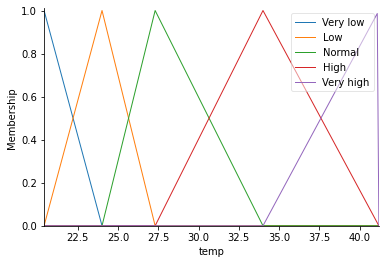

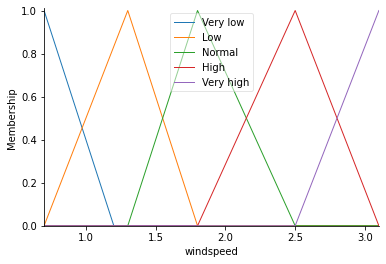

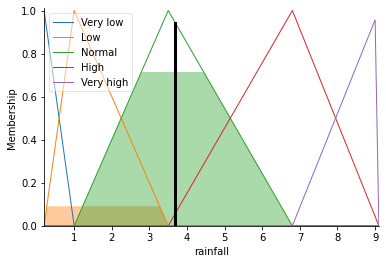

In [ ]:
#Bài 2: Prediction of rainfall using Fuzzy logic
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temp = ctrl.Antecedent(np.arange(20.4,41.3,0.1),'temp')
windspeed = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'windspeed')
rainfall=ctrl.Consequent(np.arange(0.2,9.2,0.1),'rainfall')

temp['Very low']=fuzz.trimf(temp.universe,[20.4,20.4,24])
temp['Low']=fuzz.trimf(temp.universe,[20.4,24,27.3])
temp['Normal']=fuzz.trimf(temp.universe,[24,27.3,34])
temp['High']=fuzz.trimf(temp.universe,[27.3,34,41.2])
temp['Very high']=fuzz.trimf(temp.universe,[34,41.2,41.2])

windspeed['Very low']=fuzz.trimf(windspeed.universe,[0.7,0.7,1.2])
windspeed['Low']=fuzz.trimf(windspeed.universe,[0.7,1.3,1.8])
windspeed['Normal']=fuzz.trimf(windspeed.universe,[1.3,1.8,2.5])
windspeed['High']=fuzz.trimf(windspeed.universe,[1.8,2.5,3.1])
windspeed['Very high']=fuzz.trimf(windspeed.universe,[2.5,3.1,3.1])

rainfall['Very low']=fuzz.trimf(rainfall.universe,[0.2,0.2,1])
rainfall['Low']=fuzz.trimf(rainfall.universe,[0.2,1,3.5])
rainfall['Normal']=fuzz.trimf(rainfall.universe,[1,3.5,6.8])
rainfall['High']=fuzz.trimf(rainfall.universe,[3.5,6.8,9.1])
rainfall['Very high']=fuzz.trimf(rainfall.universe,[6.8,9.1,9.1])
temp.view()
windspeed.view()
#------------------------------------------------------
rule1 = ctrl.Rule(temp['Very low'] & windspeed['Very low'], rainfall['Very low'])
rule2 = ctrl.Rule(temp['Low'] & windspeed['Very low'], rainfall['Very low'])
rule3 = ctrl.Rule(temp['Normal'] & windspeed['Very low'], rainfall['Low'])
rule4 = ctrl.Rule(temp['High'] & windspeed['Very low'], rainfall['Normal'])
rule5 = ctrl.Rule(temp['Very high'] & windspeed['Very low'], rainfall['High'])

rule6 = ctrl.Rule(temp['Very low'] & windspeed['Low'], rainfall['Very low'])
rule7 = ctrl.Rule(temp['Low'] & windspeed['Low'], rainfall['Very low'])
rule8 = ctrl.Rule(temp['Normal'] & windspeed['Low'], rainfall['Low'])
rule9 = ctrl.Rule(temp['High'] & windspeed['Low'], rainfall['Normal'])
rule10 = ctrl.Rule(temp['Very high'] & windspeed['Low'], rainfall['High'])

rule11 = ctrl.Rule(temp['Very low'] & windspeed['Normal'], rainfall['Low'])
rule12 = ctrl.Rule(temp['Low'] & windspeed['Normal'], rainfall['Low'])
rule13 = ctrl.Rule(temp['Normal'] & windspeed['Normal'], rainfall['Normal'])
rule14 = ctrl.Rule(temp['High'] & windspeed['Normal'], rainfall['High'])
rule15 = ctrl.Rule(temp['Very high'] & windspeed['Normal'], rainfall['Very high'])

rule16 = ctrl.Rule(temp['Very low'] & windspeed['High'], rainfall['Low'])
rule17 = ctrl.Rule(temp['Low'] & windspeed['High'], rainfall['Low'])
rule18 = ctrl.Rule(temp['Normal'] & windspeed['High'], rainfall['Normal'])
rule19 = ctrl.Rule(temp['High'] & windspeed['High'], rainfall['High'])
rule20 = ctrl.Rule(temp['Very high'] & windspeed['High'], rainfall['Very high'])

rule21 = ctrl.Rule(temp['Very low'] & windspeed['Very high'], rainfall['Very low'])
rule22 = ctrl.Rule(temp['Low'] & windspeed['Very high'], rainfall['Low'])
rule23 = ctrl.Rule(temp['Normal'] & windspeed['Very high'], rainfall['Normal'])
rule24 = ctrl.Rule(temp['High'] & windspeed['Very high'], rainfall['High'])
rule25 = ctrl.Rule(temp['Very high'] & windspeed['Very high'], rainfall['Very high'])
#------------------------------------------------------
rainfall_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rainfall_1 = ctrl.ControlSystemSimulation(rainfall_ctrl)
rainfall_1.input['temp'] = 27
rainfall_1.input['windspeed'] = 2
rainfall_1.compute()
rainfall.view(sim=rainfall_1)
print(rainfall_1.output['rainfall'])

277.7777777777777


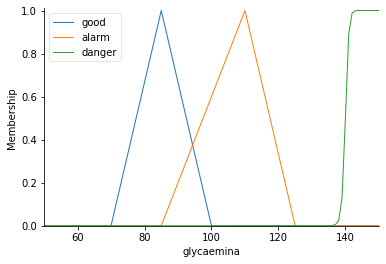

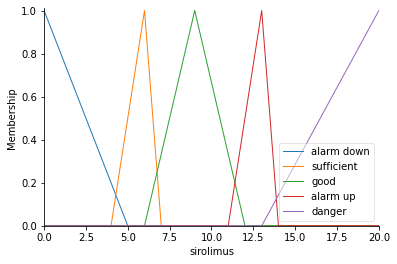

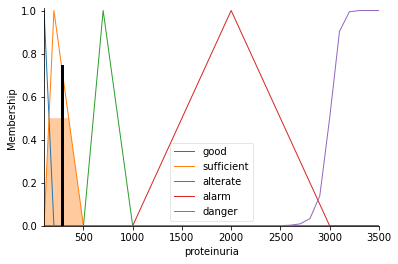

In [21]:
#Bài 3: Fuzzy logic-based clinical decision support system for the evaluation of renal function in post - Transplant Patients
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
glycaemina = ctrl.Antecedent(np.arange(50,151,1),'glycaemina')
sirolimus = ctrl.Antecedent(np.arange(0,21,1),'sirolimus')
proteinuria=ctrl.Consequent(np.arange(100,3501,100),'proteinuria')

glycaemina['good']=fuzz.trimf(glycaemina.universe,[70,85,100])
glycaemina['alarm']=fuzz.trimf(glycaemina.universe,[85,110,125])
glycaemina['danger']=fuzz.gbellmf(glycaemina.universe,10,10,150)

sirolimus['alarm down']=fuzz.trimf(sirolimus.universe,[0,0,5])
sirolimus['sufficient']=fuzz.trimf(sirolimus.universe,[4,6,7])
sirolimus['good']=fuzz.trimf(sirolimus.universe,[6,9,12])
sirolimus['alarm up']=fuzz.trimf(sirolimus.universe,[11,13,14])
sirolimus['danger']=fuzz.trimf(sirolimus.universe,[13,20,20])


proteinuria['good']=fuzz.gbellmf(proteinuria.universe,150,150,0)
proteinuria['sufficient']=fuzz.trimf(proteinuria.universe,[150,200,500])
proteinuria['alterate']=fuzz.trimf(proteinuria.universe,[500,700,1000])
proteinuria['alarm']=fuzz.trimf(proteinuria.universe,[1000,2000,3000])
proteinuria['danger']=fuzz.gbellmf(proteinuria.universe,500,5,3500)

glycaemina.view()
sirolimus.view()
#------------------------------------------------------
rule1 = ctrl.Rule(glycaemina['good'] & sirolimus['alarm down'], proteinuria['sufficient'])
rule2 = ctrl.Rule(glycaemina['good'] & sirolimus['sufficient'], proteinuria['sufficient'])
rule3 = ctrl.Rule(glycaemina['good'] & sirolimus['good'], proteinuria['good'])
rule4 = ctrl.Rule(glycaemina['good'] & sirolimus['alarm up'], proteinuria['alterate'])
rule5 = ctrl.Rule(glycaemina['good'] & sirolimus['danger'], proteinuria['alarm'])

rule6 = ctrl.Rule(glycaemina['alarm'] & sirolimus['alarm down'], proteinuria['alarm'])
rule7 = ctrl.Rule(glycaemina['alarm'] & sirolimus['sufficient'], proteinuria['alterate'])
rule8 = ctrl.Rule(glycaemina['alarm'] & sirolimus['good'], proteinuria['sufficient'])
rule9 = ctrl.Rule(glycaemina['alarm'] & sirolimus['alarm up'], proteinuria['alarm'])
rule10 = ctrl.Rule(glycaemina['alarm'] & sirolimus['danger'], proteinuria['danger'])

rule11 = ctrl.Rule(glycaemina['danger'] & sirolimus['alarm down'], proteinuria['alterate'])
rule12 = ctrl.Rule(glycaemina['danger'] & sirolimus['sufficient'], proteinuria['sufficient'])
rule13 = ctrl.Rule(glycaemina['danger'] & sirolimus['good'], proteinuria['alarm'])
rule14 = ctrl.Rule(glycaemina['danger'] & sirolimus['alarm up'], proteinuria['alterate'])
rule15 = ctrl.Rule(glycaemina['danger'] & sirolimus['danger'], proteinuria['danger'])



#------------------------------------------------------
proteinuria_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
proteinuria_1 = ctrl.ControlSystemSimulation(proteinuria_ctrl)
proteinuria_1.input['glycaemina'] = 85
proteinuria_1.input['sirolimus'] = 5
proteinuria_1.compute()
proteinuria.view(sim=proteinuria_1)
print(proteinuria_1.output['proteinuria'])